## Rohit Dhawale
## Database Information:
1. Link to the data source: 
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients 


2. Description of the data: 
This study reviewed the literature and used the following 23 variables as explanatory variables: 

Numerical Variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and 
his/her family (supplementary) credit. 

X5: Age Numerical (year). 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 
2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in 
April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 
= amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Categorical Variables: 
X2: Gender (male; female). 

X3: Education (graduate school; university;  high school; others). 

X4: Marital status (married; single; others). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to 
September 2005) as follows: X6 = the repayment status in September 2005; X7 = the repayment 
status in August 2005; ....;X11 = the repayment status in April 2005.  

Y: Default Pay. Binary Classification Variable. 

## Tasks to be performed for pre-processing of data
Data Cleaning steps to be performed:  
• Check Missing values.  
• Check Duplicates.   
• Check data type.   
• Check the number of unique values of each column.   
• Check outliers.   
• Check statistics of data set.   
• Check various categories present in the different categorical column.   
• Convert the categorical features to numerical so that they can be easily used for applying 
different models.   
• Check whether the data is balanced or not.     
• Selecting the best features for prediction.  

EDA: We will analyse distributions of defaulted customers with respect to their features such 
as Sex, Education, Marriage, Age. 

## Problem Statement:
Credit card defaults pose significant challenges and risks to lending institutions, leading to financial losses, increased non-performing assets, and potential damage to their reputation. In light of these challenges, there is a pressing need to develop innovative strategies to effectively reduce credit card defaults and minimize financial losses for lending institutions.

Objectives:

To avoid the same in the future, 'Rohit' has been engaged to assist in developing a model that identifies patterns and early warning signs of potential credit card defaults. This model aims to minimize financial losses incurred by lending institutions, enhance the stability of the credit card industry, protect credit card users' financial health and credit scores, reduce legal and administrative expenses linked to defaulted payments, safeguard the reputation and trust of lending institutions, and prevent fraudulent activities associated with credit card defaults.

Importing necessary Libraries.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Loading the data Into the code for pre-processing

In [2]:
# Load your dataset (replace 'data.csv' with your actual dataset file)
df = pd.read_csv("./data/default-of-credit-card-clients.csv",index_col=False)

Reading first few columns to ensure that we get the right data.

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Now we will start with our data pre-processing.

In above df we can see that the first row values are in fact the column headers.
So by performing below operations we can have the columns headers with a proper name and then dropping the the first row as it is of no use.

In [4]:
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

Rechecking the dataset.

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Checking the column names to check whether do we have to work on it or not.

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In below chunk of code we will be replacing the spaces with underscore in order to remove the ambiguity for column names. 

In [7]:
df.columns = [s.strip().replace(' ', '_') for s in df.columns] 
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

We will check if there are any null values in the dataset. If there are we need to address it and choose an appropriate method to fill in the missing values.

In [8]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

Now we will check the data type of variables. We can see that the datatype of all variables is object.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

Checking the number of observations and columns in the dataset.

In [10]:
df.shape

(30000, 25)

We need to convert the values in dataset to integer in order to work on them.

In [11]:
for col in df.columns:
    # Check if the column contains numeric data before converting
        df[col] = df[col].astype('int')  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int32
 1   LIMIT_BAL                   30000 non-null  int32
 2   SEX                         30000 non-null  int32
 3   EDUCATION                   30000 non-null  int32
 4   MARRIAGE                    30000 non-null  int32
 5   AGE                         30000 non-null  int32
 6   PAY_0                       30000 non-null  int32
 7   PAY_2                       30000 non-null  int32
 8   PAY_3                       30000 non-null  int32
 9   PAY_4                       30000 non-null  int32
 10  PAY_5                       30000 non-null  int32
 11  PAY_6                       30000 non-null  int32
 12  BILL_AMT1                   30000 non-null  int32
 13  BILL_AMT2                   30000 non-null  int32
 14  BILL_A

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Now after dealing with datatype, missing values and unwanted rows, we will now rename the columns to that it will be easy to work on later in the visualization and modelling section.

In [14]:
#renaming columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
df.rename(columns={'default_payment_next_month':'Default_payment'},inplace=True)

The code below will create a vertical bar plot that shows the distribution of unique values in the 'AGE' column of the DataFrame df. Each bar represents a unique age value, and the height of the bar represents the count of occurrences of that age in the DataFrame. This kind of plot is useful for visualizing the distribution of categorical data, such as age groups in a dataset.

<Axes: xlabel='index', ylabel='AGE'>

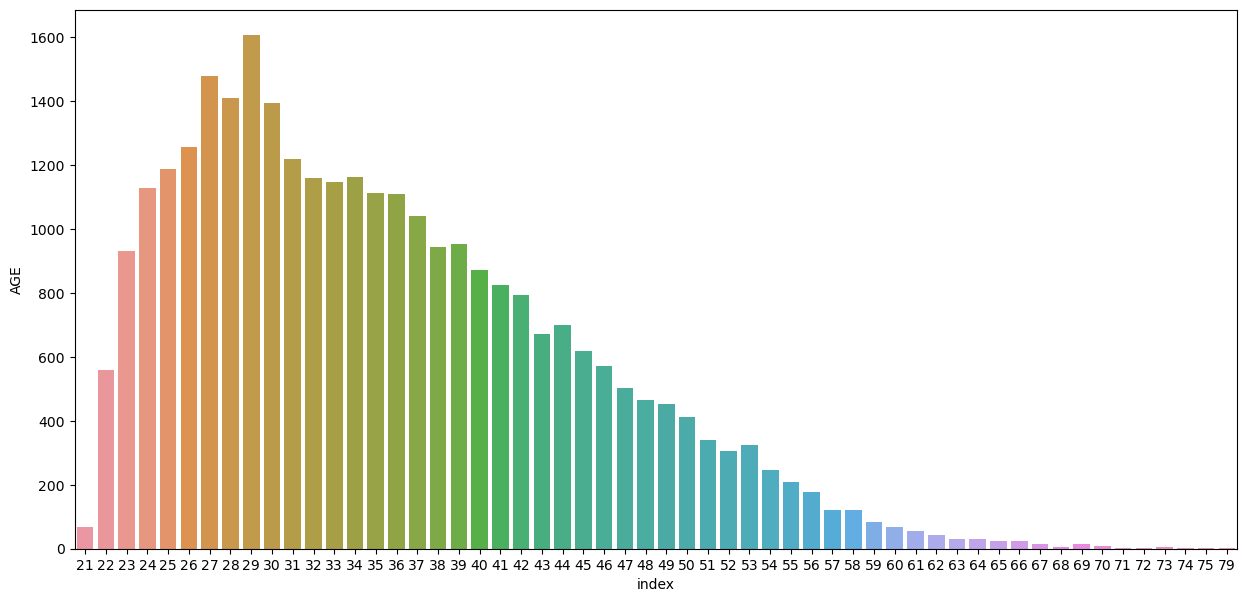

In [15]:
plt.figure(figsize=(15,7))
df_age=df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=df_age,orient='v')

Checking the unique value counts of the Default payment variable.

In [16]:
df['Default_payment'].value_counts()

0    23364
1     6636
Name: Default_payment, dtype: int64

Below graph will help us visualize the amount the defaulters and non-defaulters.

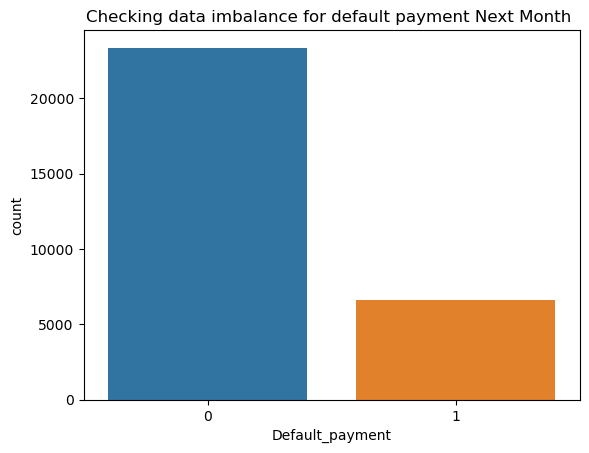

In [17]:
plt.title('Checking data imbalance for default payment Next Month ')
ax1 = sns.countplot(x= 'Default_payment', data = df)

plt.show()

We are checking the unique value counts for other variables.

In [18]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [19]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we have add up them in 4, which is Others.

**Education**
1. graduate school
2. university
3. high school
4. others

In [20]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [21]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So we are adding them in Others category.

**Marriage**  
Married = 1  
Single = 2  
others = 3  

In [22]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Now we will preform some visualizations to get a better idea as of those who are defaulters and those who are not. We will be doing this for sex, education and marriage categories.

We are creating list of features for visualization.

In [23]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [24]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['Default_payment']

We are converting the numeric categories to characters for the visualiation purpose. This will help us to get better idea of the visualizations.

In [25]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

Creating visualization for all variables at once using loop.
This will perform  
1. Sex vs Defaulter Count  
2. Education vs Defaulter Count
3. Marriage vs Defaulter Count

#### Discussing the visualizations and graphs

**Sex vs Defaulter Count**  
Based on total numbers, we can see that the female in general have more usage of credit card resulting in more defaulters than male.

**Education vs Defaulter Count**  
University Students tend to default more than any other categories.

**Marriage vs Defaulter Count**  
Single people have more default rate than any other categories.

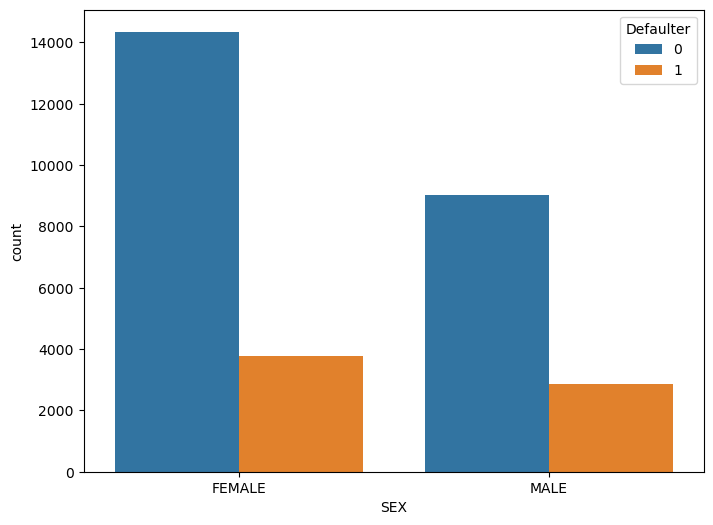

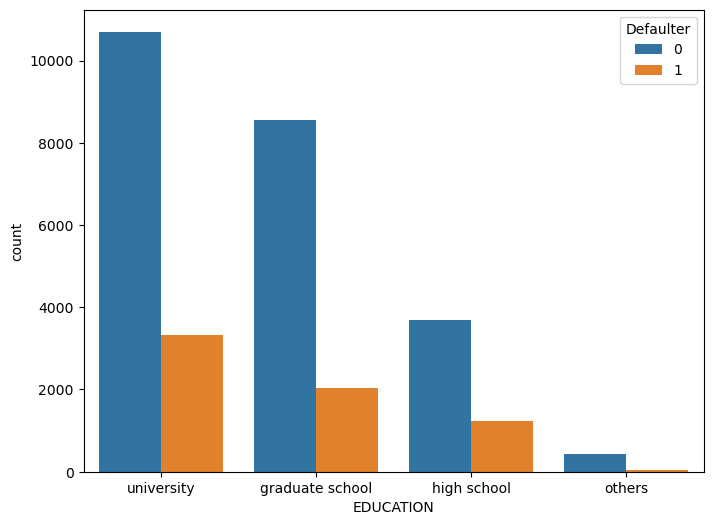

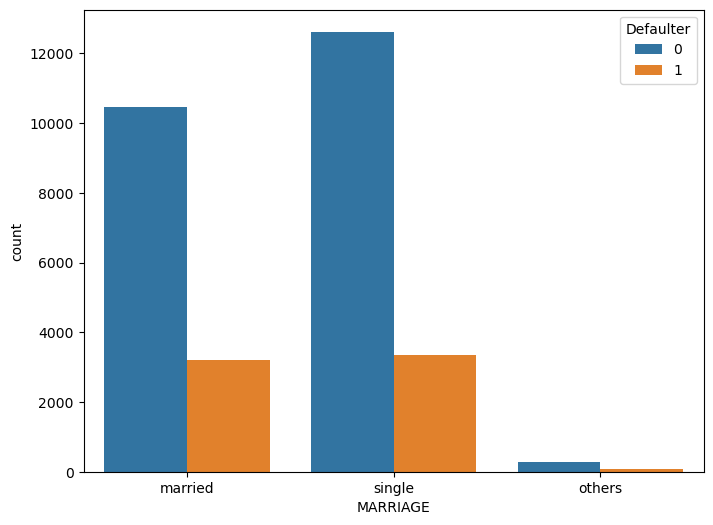

In [26]:
for col in categorical_features:
  plt.figure(figsize=(8,6))
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

The pair plot is a powerful tool for exploring the relationships between multiple variables and understanding how they might be related, especially when you want to differentiate between categories using colors, as is the case here with 'Default_payment'.

Here we can see the payment defaulters and non-defaulters are shown for each month. This can help you visually inspect how billing amounts in different months relate to each other and how they might differ for those who default on payments and those who don't.

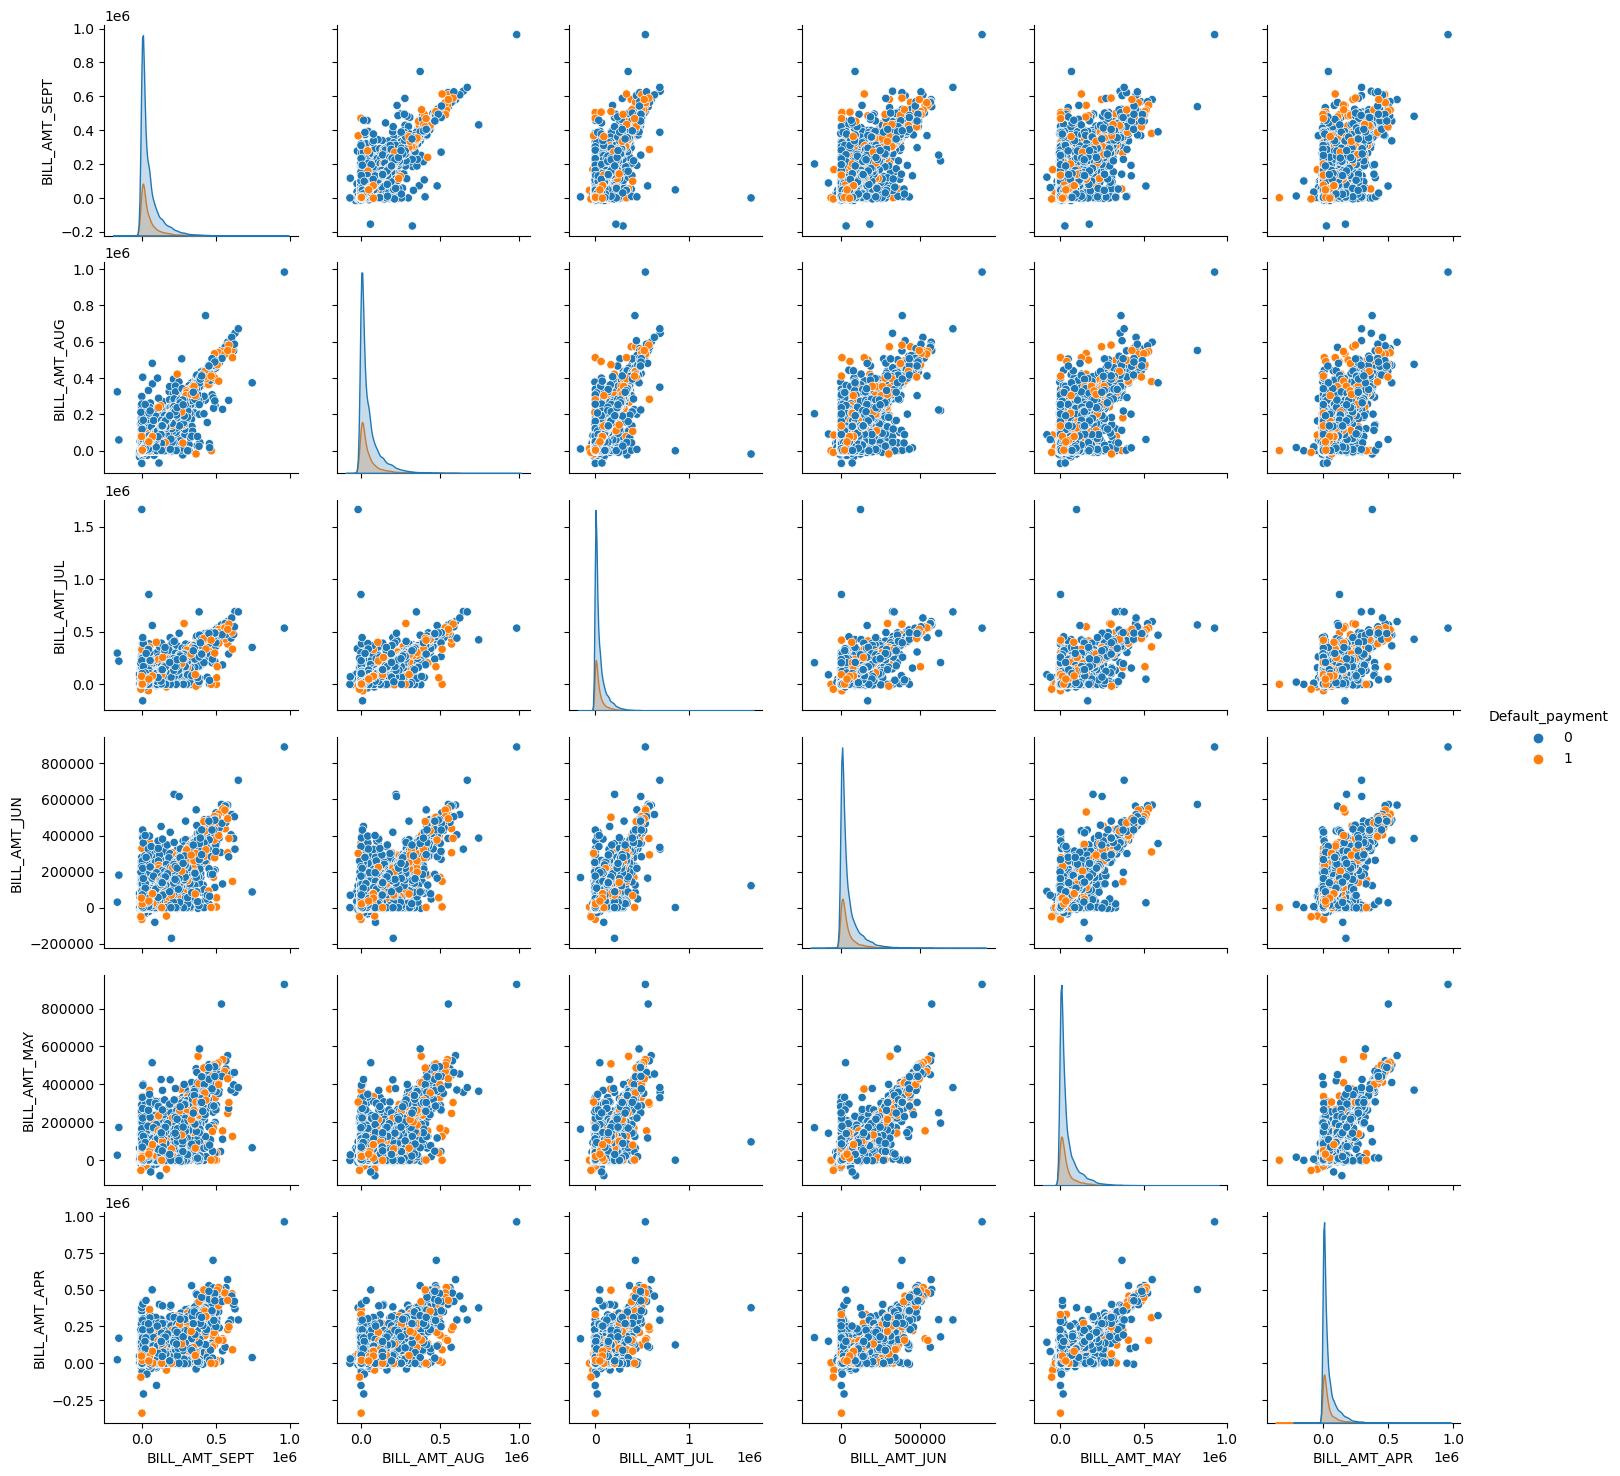

In [27]:
bill_amnt_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR','Default_payment']]
sns.pairplot(data = bill_amnt_df,hue='Default_payment')

Heatmap for correlation:

This code creates a heatmap that visually represents the correlations between bill statement amounts for different months (April to September) in the dataset. It's a useful way to quickly identify relationships between these variables. Negative correlations are represented by warmer colors (towards red), positive correlations by cooler colors (towards salmon color), and no correlation by white.

In below graph we can see that mostly all values have positive correlation with each other.

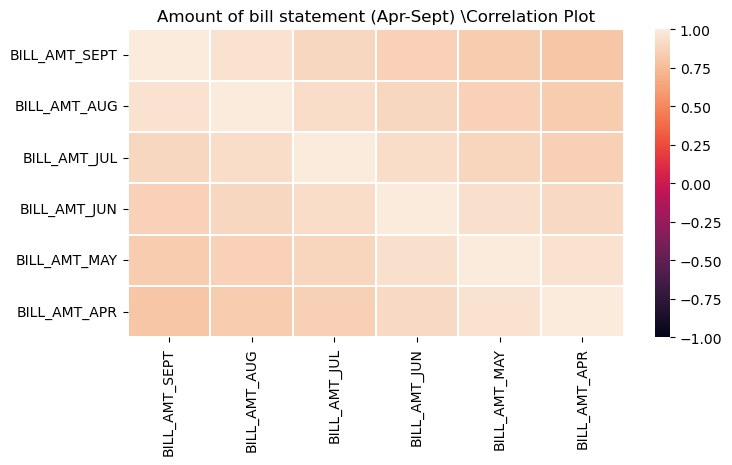

In [28]:
var = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']
plt.figure(figsize = (8,4))
plt.title('Amount of bill statement (Apr-Sept) \Correlation Plot')
corr = df[var].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

Checking the correlation of different billing amount with target variable.

In [29]:
corr = df[var].corr()
corr

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
BILL_AMT_SEPT,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650
BILL_AMT_AUG,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594
BILL_AMT_JUL,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320
BILL_AMT_JUN,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941
BILL_AMT_MAY,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197
BILL_AMT_APR,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000


Here we can see the payment defaulters and non-defaulters are shown for each month. This can help you visually inspect how payment amounts in different months relate to each other and how they might differ for those who default on payments and those who don't.

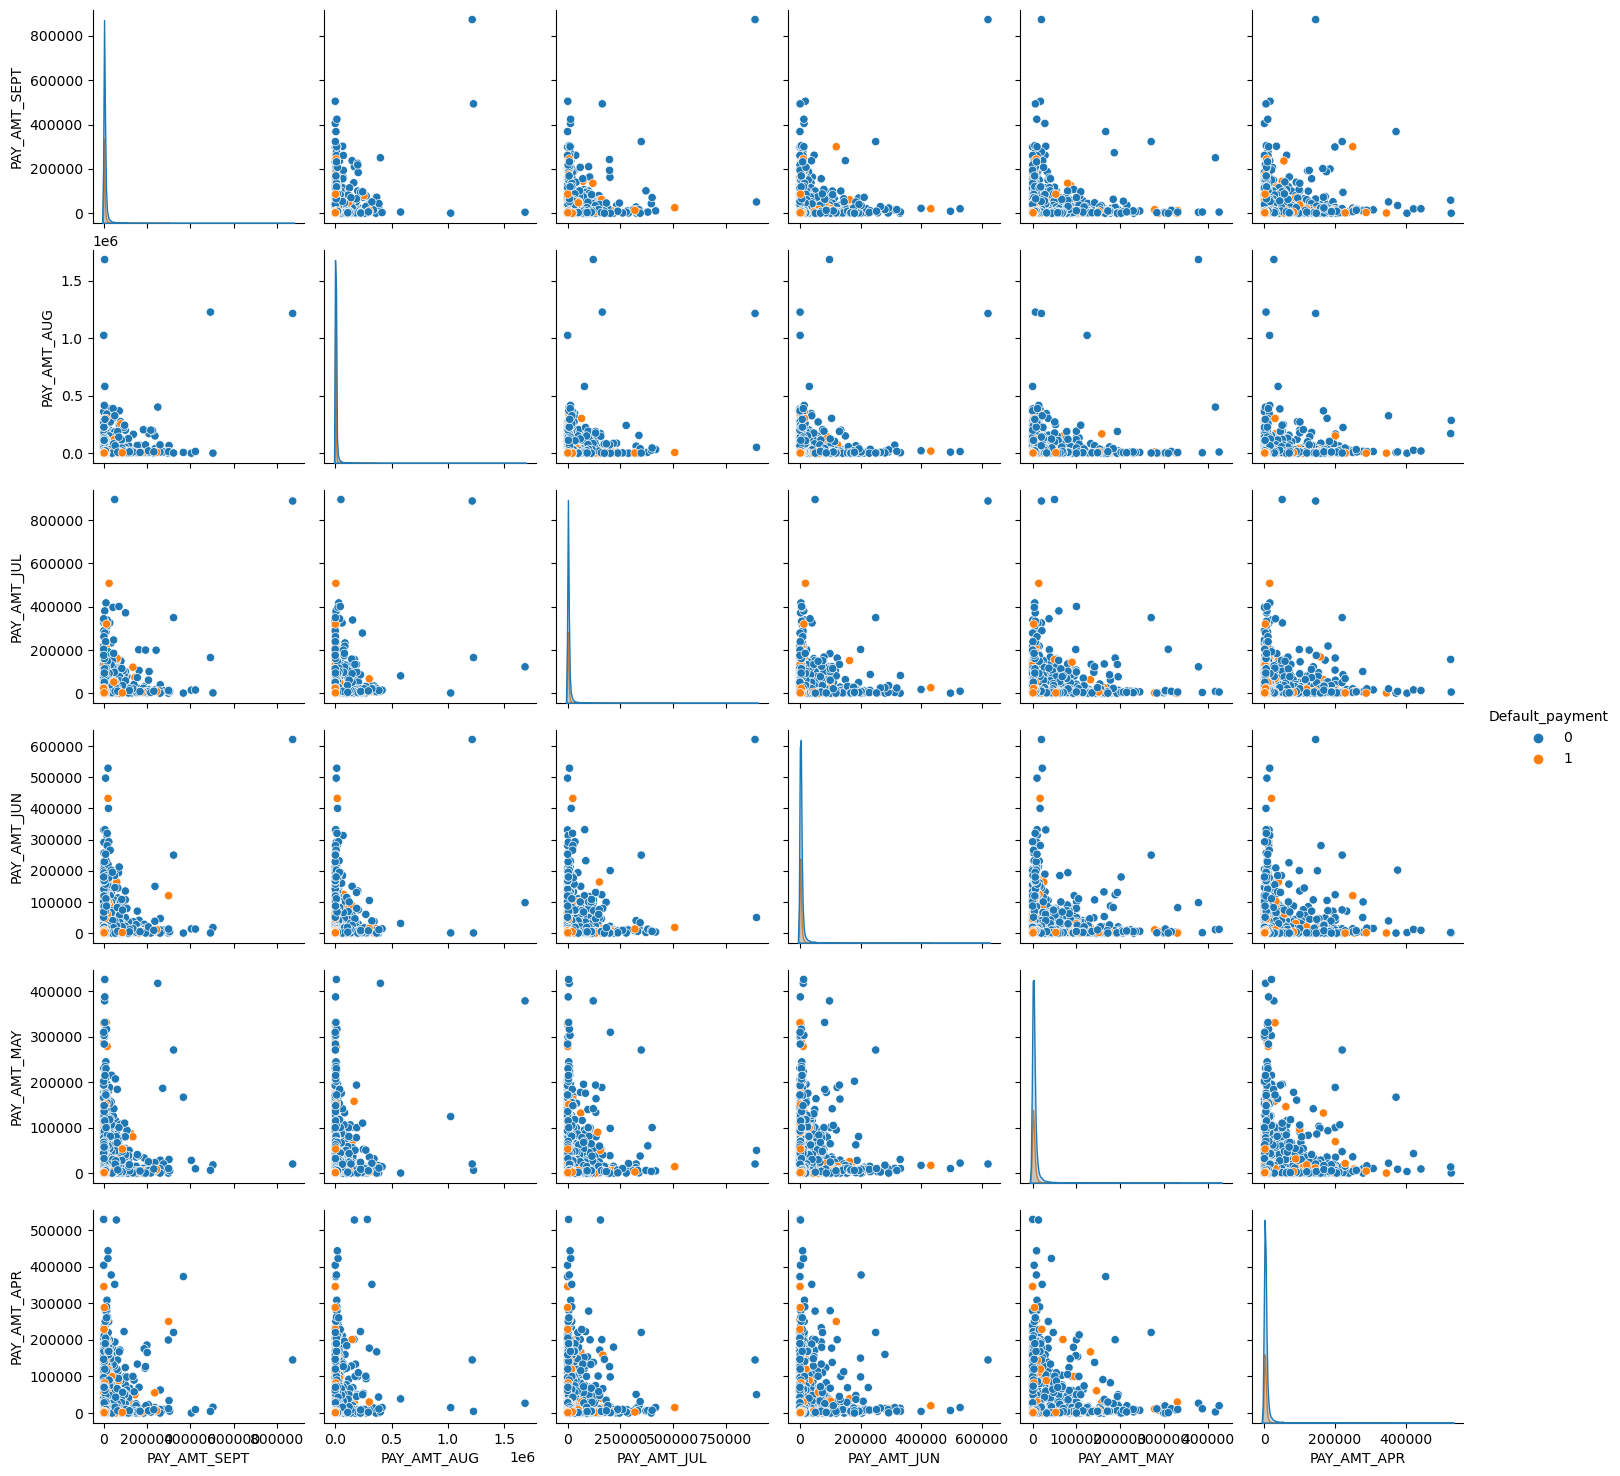

In [30]:
pay_amnt_df = df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN',	'PAY_AMT_MAY','PAY_AMT_APR','Default_payment']]
sns.pairplot(data = pay_amnt_df, hue='Default_payment')

Heatmap for correlation:

This code creates a heatmap that visually represents the correlations between payment amounts for different months (April to September) in the dataset. It's a useful way to quickly identify relationships between these variables. Negative correlations are represented by warmer colors (towards red), positive correlations by cooler colors (towards salmon color), and no correlation by white.


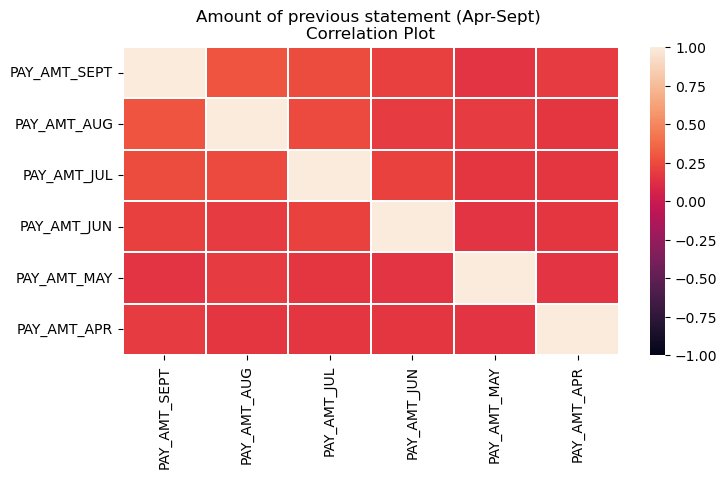

In [31]:
var = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
plt.figure(figsize = (8,4))
plt.title('Amount of previous statement (Apr-Sept) \nCorrelation Plot')
corr = df[var].corr()

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

Checking the correlation in values of amount payment with target variable.

In [32]:
corr = df[var].corr()
corr

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
PAY_AMT_SEPT,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT_AUG,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_AMT_JUL,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_AMT_JUN,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834
PAY_AMT_MAY,0.148459,0.180908,0.159214,0.151830,1.000000,0.154896
PAY_AMT_APR,0.185735,0.157634,0.162740,0.157834,0.154896,1.000000


The count plots can help in understanding the relationship between payment behavior in different months and the likelihood of defaulting on payments. For example, you can see whether a specific payment status in a given month is associated with a higher or lower likelihood of default.

In below graphs it can be seen as if the payments are done on time then likeliness of being defaulter is less.

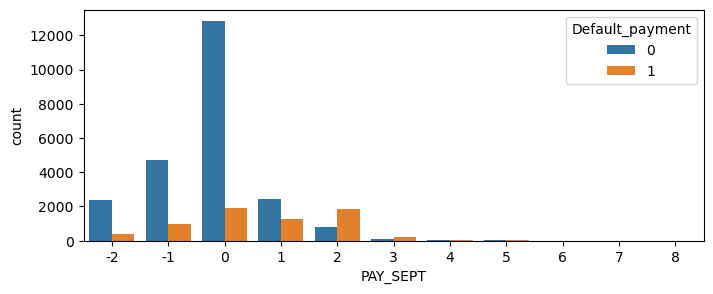

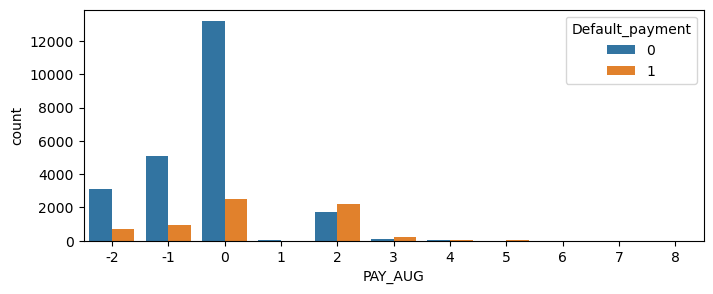

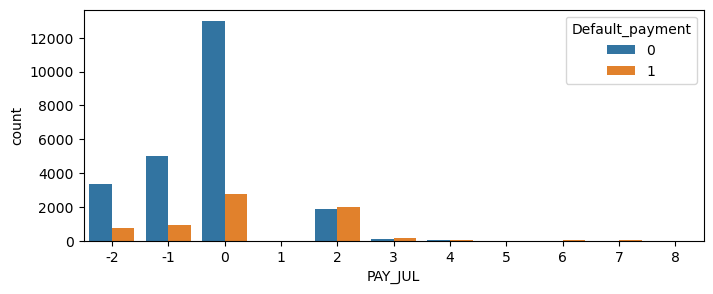

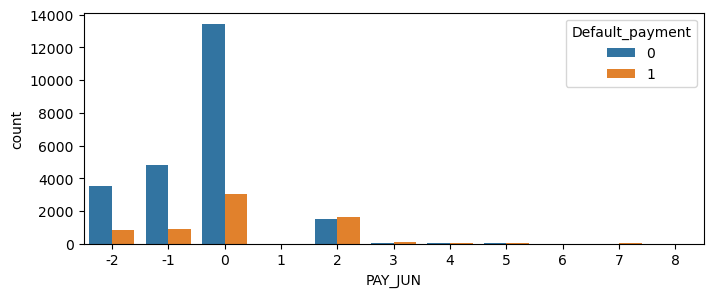

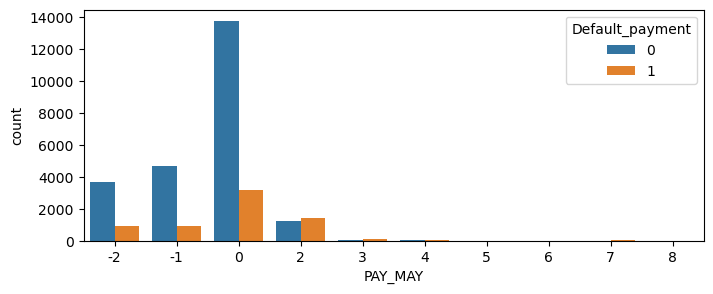

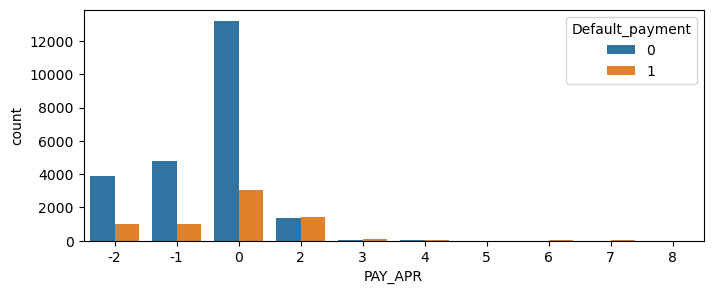

In [33]:
pay_df=['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in pay_df:
  plt.figure(figsize=(8,3))
  sns.countplot(x = col, hue = 'Default_payment', data = df)

Heatmap for correlation:

This code creates a heatmap that visually represents the correlations between repayment amounts for different months (April to September) in the dataset. It's a useful way to quickly identify relationships between these variables. Negative correlations are represented by warmer colors (towards red), positive correlations by cooler colors (towards salmon color), and no correlation by white.


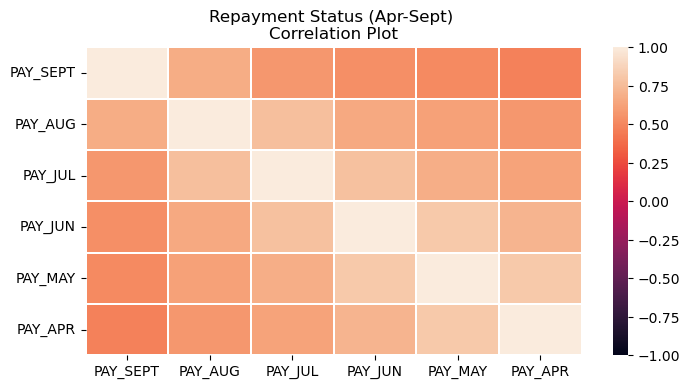

In [34]:
var = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
plt.figure(figsize = (8,4))
plt.title('Repayment Status (Apr-Sept) \nCorrelation Plot')
corr = df[var].corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)
plt.show()

Looking for correlation values of repayment with target variable.

In [35]:
corr = df[var].corr()
corr

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
PAY_SEPT,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553
PAY_AUG,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501
PAY_JUL,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684
PAY_JUN,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449
PAY_MAY,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900
PAY_APR,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000


Null Hypothesis:- All variable depends on customers next month payment

Alternate Hypothesis:- All variables do not depend on customers next month payment.

Two sample t-test to check variables are significant or not

In [36]:
numeric_features = ['ID', 'LIMIT_BAL', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Default_payment']
df_tstats=pd.DataFrame()
for eachvariable in numeric_features:
    tstats=stats.ttest_ind(df.loc[df["Default_payment"]== 1,eachvariable],df.loc[df["Default_payment"]==0, eachvariable]) 
    df_temp=pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    df_temp.columns=['Variable Name', 'T-statistic', 'P-Value']
    df_tstats=pd.concat([df_tstats,df_temp], axis=0, ignore_index=True)

df_tstats=df_tstats.sort_values (by ="P-Value").reset_index(drop=True)
df_tstats

,Variable Name,T-statistic,P-Value
0,Default_payment,inf,0.0
1,PAY_SEPT,59.478693,0.0
2,PAY_AUG,47.31986,0.0
3,PAY_JUL,41.922147,0.0
4,PAY_JUN,38.429754,0.0
5,PAY_MAY,36.119125,0.0
6,PAY_APR,32.945447,0.0
7,LIMIT_BAL,-26.908522,0.0
8,PAY_AMT_SEPT,-12.665063,0.0
9,PAY_AMT_AUG,-10.163244,0.0


Here our level of significance(alpha ) is 0.05. we got variable BILL_AMT4, BILL_AMT5, BILL_AMT6, which are not significance so we reject the null hypothesis.

In [37]:
columns_to_drop=['BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
df = df.drop(columns=columns_to_drop)

Convert the pre-processed dataframe to csv to perform modelling task on it.

In [39]:
df.to_csv("./data/default-of-credit-card-clients-preprocessed.csv")